In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/r4ph/desenv/exception-miner-multi/llm/new_flask_llm.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/r4ph/desenv/exception-miner-multi/llm/new_flask_llm.csv'

In [14]:
def get_first_word_before_comma(text):
    # Find the position of the first comma
    comma_index = text.find(',')

    # If there's no comma, return -1 to indicate an invalid result
    if comma_index == -1:
        first_word = text
        first_word = first_word.replace("\n", "")
        if first_word.lower() == "yes":
            return 1
        elif first_word.lower() == "no":
            return 0
        else:
            return -1

    # Extract the substring before the comma
    first_part = text[:comma_index]

    # Split the substring to get the first word
    first_word = first_part.split()[0]

    # Check for "Yes/yes" or "No/no"
    if first_word.lower() == "yes":
        return 1
    elif first_word.lower() == "no":
        return 0
    else:
        return -1

In [15]:
df['llm_resp_binary'] = df['llm_response'].apply(get_first_word_before_comma)

In [16]:
df[df['llm_resp_binary'] == -1]

,file,function,func_body,str_uncaught_exceptions,n_try_except,n_try_pass,n_finally,n_generic_except,n_raise,n_captures_broad_raise,...,str_except_identifiers,str_raise_identifiers,str_except_block,n_nested_try,n_bare_except,n_bare_raise_finally,str_code_without_try_except,project,llm_response,llm_resp_binary
27,/home/r4ph/desenv/exception-miner-multi/projec...,_get_source_explained,"def _get_source_explained(\n self, envi...",NaN,1,0,0,0,1,0,...,TemplateNotFound,TemplateNotFound,rv = None,0,0,0,"def _get_source_explained(\n self, envi...",flask,\nThe code snippet provided does not contain a...,-1


In [17]:
df.groupby(['n_try_except', 'llm_resp_binary']).count()

file  function  func_body  \
n_try_except llm_resp_binary                              
0             0                  4         4          4   
              1                 41        41         41   
1            -1                  1         1          1   
              0                  2         2          2   
              1                 42        42         42   

                              str_uncaught_exceptions  n_try_pass  n_finally  \
n_try_except llm_resp_binary                                                   
0             0                                     0           4          4   
              1                                     0          41         41   
1            -1                                     0           1          1   
              0                                     0           2          2   
              1                                     0          42         42   

                              n_generic_except  n_raise  \
n_try_except llm_resp_binary                              
0             0                              4        4   
              1                             41       41   
1            -1                              1        1   
              0                              2        2   
              1                             42       42   

                              n_captures_broad_raise  \
n_try_except llm_resp_binary                           
0             0                                    4   
              1                                   41   
1            -1                                    1   
              0                                    2   
              1                                   42   

                              n_captures_try_except_raise  ...  n_try_return  \
n_try_except llm_resp_binary                               ...                 
0             0                                         4  ...             4   
              1                                        41  ...            41   
1            -1                                         1  ...             1   
              0                                         2  ...             2   
              1                                        42  ...            42   

                              str_except_identifiers  str_raise_identifiers  \
n_try_except llm_resp_binary                                                  
0             0                                    0                      1   
              1                                    0                      2   
1            -1                                    1                      1   
              0                                    2                      1   
              1                                   42                     20   

                              str_except_block  n_nested_try  n_bare_except  \
n_try_except llm_resp_binary                                                  
0             0                              0             4              4   
              1                              0            41             41   
1            -1                              1             1              1   
              0                              2             2              2   
              1                             42            42             42   

                              n_bare_raise_finally  \
n_try_except llm_resp_binary                         
0             0                                  4   
              1                                 41   
1            -1                                  1   
              0                                  2   
              1                                 42   

                              str_code_without_try_except  project  \
n_try_except llm_resp_binary                                         
0             0                                         0   

In [18]:
df_matrix = df[df['llm_resp_binary'] != -1]
df_matrix.shape

(89, 24)

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df_matrix['n_try_except']
y_pred = df_matrix['llm_resp_binary']

# Calculate metrics
accuracy = accuracy_score(X, y_pred)
precision = precision_score(X, y_pred)
recall = recall_score(X, y_pred)
f_measure = f1_score(X, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f_measure:.2f}")

# Optionally, display the confusion matrix
cm = confusion_matrix(X, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.52
Precision: 0.51
Recall: 0.95
F-measure: 0.66

Confusion Matrix:
[[ 4 41]
 [ 2 42]]


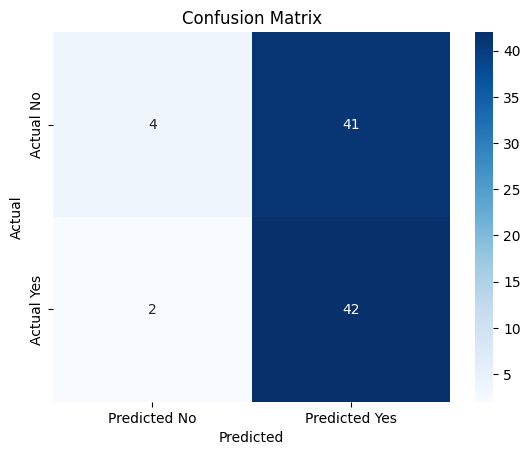

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
